In [1]:
# needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Collect and Prepare Data

In [2]:
# getting data
URL = "https://www.nufusu.com/ulke/turkiye-nufusu"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

table = soup.find(class_="pure-table")
rows = table.find_all('tr') 


# year list
year_list = []
for row in rows:
    r = row.find_all('td')
    if (len(r) != 0): year_list.append(r[1].text)

year_list.sort()


# population list
population_list = []
for row in rows:
    r = row.find_all('td')
    if (len(r) != 0): population_list.append(r[2].text)

population_list.reverse()

In [3]:
# list to numpy array
years = np.array(year_list, dtype='int64')

i = 0
for p in population_list: 
    population_list[i] = p.replace('.', '')
    i += 1

populations = np.array(population_list, dtype='int64')

# Plot of the Dataset

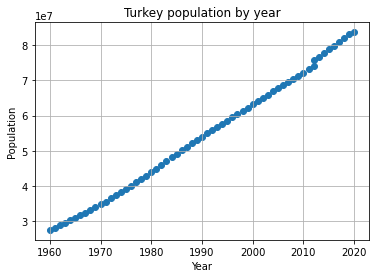

In [4]:
# scatter plot
plt.scatter(years, populations)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Turkey population by year')
plt.grid(True)
plt.show()

# Linear Model

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
#Create df
y = pd.DataFrame(populations, columns=['population'])
x = pd.DataFrame(years, columns=['year'])

In [7]:
x.join(y).head()
# pd.DataFrame(populations, index=years)

,year,population
0,1960,27553280
1,1961,28229291
2,1962,28909985
3,1963,29597047
4,1964,30292969


In [8]:
x.head()

,year
0,1960
1,1961
2,1962
3,1963
4,1964


In [9]:
y.head()

,population
0,27553280
1,28229291
2,28909985
3,29597047
4,30292969


In [10]:
reg = LinearRegression()

In [11]:
model = reg.fit(x, y)

In [12]:
model.intercept_
# output: array([-1.83151654e+09])

array([-1.83151654e+09])

In [13]:
model.coef_
# output: array([[947514.5946733]])

array([[947514.5946733]])

$ Y = -1.83*10^9 + 947,514.59*X $

In [14]:
model.score(x,y) #accuracy of the model
# output: 0.9980679275814964

0.9980679275814964

# Prediction

In [15]:
result = model.predict([[2030]])[0][0]

In [16]:
print(f"Turkey population in 2030 will be {int(result):,}")
# output: 'Turkey population in 2030 will be 91,938,084'

Turkey population in 2030 will be 91,938,084
